In [1]:
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,indiatoday,ndtv,republic
aanybody,1,0,0
aapke,0,0,1
aaron,0,0,1
aarthi,0,2,0
abalance,1,0,1


In [2]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'indiatoday': [('court', 32),
  ('think', 21),
  ('act', 18),
  ('given', 17),
  ('said', 17),
  ('know', 16),
  ('today', 15),
  ('come', 15),
  ('judgment', 15),
  ('supreme', 15),
  ('muslims', 15),
  ('people', 14),
  ('mosque', 13),
  ('want', 13),
  ('new', 13),
  ('verdict', 12),
  ('question', 12),
  ('temple', 12),
  ('closure', 11),
  ('hindus', 11),
  ('evidence', 11),
  ('just', 10),
  ('say', 10),
  ('law', 10),
  ('land', 10),
  ('issue', 10),
  ('saying', 10),
  ('yes', 9),
  ('like', 9),
  ('build', 9)],
 'ndtv': [('court', 40),
  ('know', 29),
  ('case', 26),
  ('just', 23),
  ('say', 22),
  ('said', 21),
  ('want', 20),
  ('okay', 19),
  ('party', 18),
  ('mean', 17),
  ('let', 16),
  ('temple', 16),
  ('supreme', 16),
  ('right', 15),
  ('people', 15),
  ('come', 15),
  ('dont', 14),
  ('im', 12),
  ('bjp', 12),
  ('issue', 12),
  ('land', 12),
  ('think', 12),
  ('hindu', 12),
  ('like', 11),
  ('board', 11),
  ('mr', 11),
  ('political', 11),
  ('going', 11),
  ('

In [3]:
for channel, top_words in top_dict.items():
    print(channel)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

indiatoday
court, think, act, given, said, know, today, come, judgment, supreme, muslims, people, mosque, want
---
ndtv
court, know, case, just, say, said, want, okay, party, mean, let, temple, supreme, right
---
republic
im, want, say, court, dont, said, know, today, country, come, supreme, people, saying, yesterday
---


In [4]:
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['court',
 'think',
 'act',
 'given',
 'said',
 'know',
 'today',
 'come',
 'judgment',
 'supreme',
 'muslims',
 'people',
 'mosque',
 'want',
 'new',
 'verdict',
 'question',
 'temple',
 'closure',
 'hindus',
 'evidence',
 'just',
 'say',
 'law',
 'land',
 'issue',
 'saying',
 'yes',
 'like',
 'build',
 'court',
 'know',
 'case',
 'just',
 'say',
 'said',
 'want',
 'okay',
 'party',
 'mean',
 'let',
 'temple',
 'supreme',
 'right',
 'people',
 'come',
 'dont',
 'im',
 'bjp',
 'issue',
 'land',
 'think',
 'hindu',
 'like',
 'board',
 'mr',
 'political',
 'going',
 'muslim',
 'point',
 'im',
 'want',
 'say',
 'court',
 'dont',
 'said',
 'know',
 'today',
 'country',
 'come',
 'supreme',
 'people',
 'saying',
 'yesterday',
 'india',
 'tell',
 'just',
 'make',
 'let',
 'thing',
 'did',
 'like',
 'judgment',
 'verdict',
 'need',
 'point',
 'yeah',
 'muslims',
 'congress',
 'time']

In [5]:
Counter(words).most_common()

[('court', 3),
 ('said', 3),
 ('know', 3),
 ('come', 3),
 ('supreme', 3),
 ('people', 3),
 ('want', 3),
 ('just', 3),
 ('say', 3),
 ('like', 3),
 ('think', 2),
 ('today', 2),
 ('judgment', 2),
 ('muslims', 2),
 ('verdict', 2),
 ('temple', 2),
 ('land', 2),
 ('issue', 2),
 ('saying', 2),
 ('let', 2),
 ('dont', 2),
 ('im', 2),
 ('point', 2),
 ('act', 1),
 ('given', 1),
 ('mosque', 1),
 ('new', 1),
 ('question', 1),
 ('closure', 1),
 ('hindus', 1),
 ('evidence', 1),
 ('law', 1),
 ('yes', 1),
 ('build', 1),
 ('case', 1),
 ('okay', 1),
 ('party', 1),
 ('mean', 1),
 ('right', 1),
 ('bjp', 1),
 ('hindu', 1),
 ('board', 1),
 ('mr', 1),
 ('political', 1),
 ('going', 1),
 ('muslim', 1),
 ('country', 1),
 ('yesterday', 1),
 ('india', 1),
 ('tell', 1),
 ('make', 1),
 ('thing', 1),
 ('did', 1),
 ('need', 1),
 ('yeah', 1),
 ('congress', 1),
 ('time', 1)]

In [6]:
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

[]

In [16]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SidG\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [17]:
add_stop_words=stop_words
add_stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [18]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [19]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [20]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

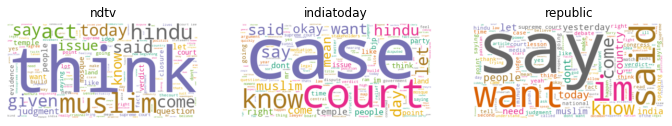

In [22]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['ndtv', 'indiatoday', 'republic']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

There isnt much to conclude from here so lets jump to Sentiment analysis